In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from math import floor
raw_df = pd.read_csv('data/compas-scores-raw.csv')

In [56]:
print(raw_df.columns)
ethnicities = set(raw_data.Ethnic_Code_Text)

Index(['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text', 'LastName',
       'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text',
       'DateOfBirth', 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason',
       'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus',
       'Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
       'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType', 'IsCompleted', 'IsDeleted'],
      dtype='object')


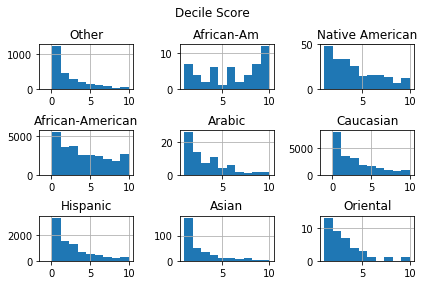

In [57]:
# Histograms of different races' decile scores
fig, axes = plt.subplots(3, 3)
plt.suptitle('Decile Score')
for i, ethnicity in enumerate(ethnicities):
    axis = axes[floor(i / 3), i % 3]
    raw_df[raw_df.Ethnic_Code_Text == ethnicity].DecileScore.hist(ax=axis)
    axis.set_title(ethnicity)
plt.tight_layout()
plt.subplots_adjust(top=.85)
plt.show()

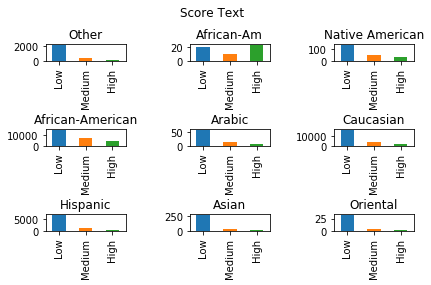

In [58]:
# Bar plots of text scores by races
fig, axes = plt.subplots(3, 3)
plt.suptitle('Score Text')
for i, ethnicity in enumerate(ethnicities):
    axis = axes[floor(i / 3), i % 3]
    raw_df[raw_df.Ethnic_Code_Text == ethnicity].ScoreText.value_counts() \
        .reindex(('Low', 'Medium', 'High')).plot(ax=axis, kind='bar')
    axis.set_title(ethnicity)
    # axis.set_xticks('low', 'high')
plt.tight_layout()
plt.subplots_adjust(wspace=.8, hspace=4., top=.85)
plt.show()


In [59]:
violent_df = pd.read_csv('data/cox-violent-parsed.csv')
print(violent_df.columns)
ethnicities = set(violent_df.race)

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event'],
      dtype='object')


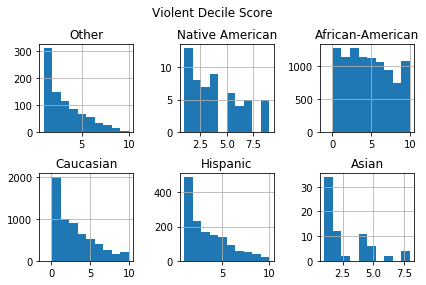

In [60]:
# Histograms of different races' decile scores
fig, axes = plt.subplots(2, 3)
plt.suptitle('Violent Decile Score')
for i, ethnicity in enumerate(ethnicities):
    axis = axes[floor(i / 3), i % 3]
    violent_df[violent_df.race == ethnicity].v_decile_score.hist(ax=axis)
    axis.set_title(ethnicity)
plt.tight_layout()
plt.subplots_adjust(top=.85)
plt.show()

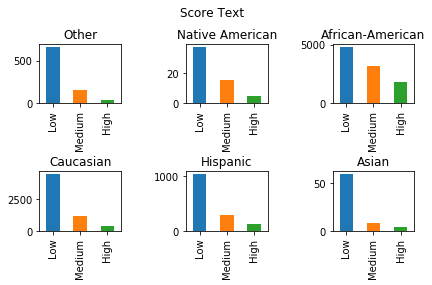

In [61]:
# Bar plots of violent text scores by races
fig, axes = plt.subplots(2, 3)
plt.suptitle('Score Text')
for i, ethnicity in enumerate(ethnicities):
    axis = axes[floor(i / 3), i % 3]
    violent_df[violent_df.race == ethnicity].v_score_text.value_counts() \
        .reindex(('Low', 'Medium', 'High')).plot(ax=axis, kind='bar')
    axis.set_title(ethnicity)
    # axis.set_xticks('low', 'high')
plt.tight_layout()
plt.subplots_adjust(wspace=.8, top=.85)
plt.show()


In [62]:
propub_df = pd.read_csv('data/propublica_data_for_fairml.csv')
print(propub_df.columns)

Index(['Two_yr_Recidivism', 'Number_of_Priors', 'score_factor',
       'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American',
       'Asian', 'Hispanic', 'Native_American', 'Other', 'Female',
       'Misdemeanor'],
      dtype='object')


In [63]:
races = ['African_American', 'Asian', 'Hispanic', 'Native_American', 'Other']
propub_df['race'] = ''
for r in races:
    propub_df.race = propub_df.race + propub_df[r].apply(lambda x: r if x == 1 else '')
propub_df[:15]


,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor,race
0,0,0,0,1,0,0,0,0,0,1,0,0,Other
1,1,0,0,0,0,1,0,0,0,0,0,0,African_American
2,1,4,0,0,1,1,0,0,0,0,0,0,African_American
3,0,0,0,0,0,0,0,0,0,1,0,1,Other
4,1,14,1,0,0,0,0,0,0,0,0,0,
5,0,3,0,0,0,0,0,0,0,1,0,0,Other
6,0,0,0,0,0,0,0,0,0,0,1,1,
7,0,0,0,0,0,0,0,0,0,0,0,0,
8,1,3,1,0,1,1,0,0,0,0,0,1,African_American
9,0,0,0,0,0,0,0,0,0,0,1,1,


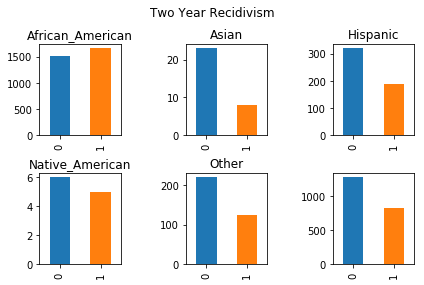

In [64]:
# Bar plots of two year recidivism by races, final plot is for unknown race (most likely caucasian)
fig, axes = plt.subplots(2, 3)
plt.suptitle('Two Year Recidivism')
for i, ethnicity in enumerate(races + ['']):
    axis = axes[floor(i / 3), i % 3]
    propub_df[propub_df.race == ethnicity].Two_yr_Recidivism.value_counts() \
        .reindex((0, 1)).plot(ax=axis, kind='bar')
    axis.set_title(ethnicity)
    # axis.set_xticks('low', 'high')
plt.tight_layout()
plt.subplots_adjust(wspace=.8, top=.85)
plt.show()
